# House Price Prediction Regression Project

# Project Goal

# Import Libraries/Load Libraries/Load Modules

In [1]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns
import calendar

from pandas.api.types import CategoricalDtype

from sklearn.preprocessing import StandardScaler

# Load Dataset

In [2]:
train_data_path = r"C:\Users\gk521\House_Data\train.csv"
test_data_path = r"C:\Users\gk521\House_Data\test.csv"

df_train = pd.read_csv(train_data_path)
df_test = pd.read_csv(test_data_path)

print("Shape of df_train:", df_train.shape)
print("Shape of df_test:", df_test.shape)

Shape of df_train: (1168, 81)
Shape of df_test: (292, 80)


In [3]:
df_train

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,127,120,RL,NaN,4928,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2007,WD,Normal,128000
1,889,20,RL,95.0,15865,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,10,2007,WD,Normal,268000
2,793,60,RL,92.0,9920,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,6,2007,WD,Normal,269790
3,110,20,RL,105.0,11751,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,1,2010,COD,Normal,190000
4,422,20,RL,NaN,16635,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,6,2009,WD,Normal,215000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1163,289,20,RL,NaN,9819,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,122000
1164,554,20,RL,67.0,8777,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,5,2009,WD,Normal,108000
1165,196,160,RL,24.0,2280,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,7,2009,WD,Normal,148500
1166,31,70,C (all),50.0,8500,Pave,Pave,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,7,2008,WD,Normal,40000


In [4]:
pd.set_option("display.max_columns", None)

In [5]:
pd.set_option("display.max_columns", 80)

In [6]:
df_train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,...,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,127,120,RL,NaN,4928,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,NPkVill,Norm,Norm,TwnhsE,1Story,6,5,1976,1976,Gable,CompShg,Plywood,Plywood,None,0.0,TA,TA,CBlock,Gd,TA,No,ALQ,120,Unf,0,958,1078,GasA,...,Y,SBrkr,958,0,0,958,0,0,2,0,2,1,TA,5,Typ,1,TA,Attchd,1977.0,RFn,2,440,TA,TA,Y,0,205,0,0,0,0,NaN,NaN,NaN,0,2,2007,WD,Normal,128000
1,889,20,RL,95.0,15865,Pave,NaN,IR1,Lvl,AllPub,Inside,Mod,NAmes,Norm,Norm,1Fam,1Story,8,6,1970,1970,Flat,Tar&Grv,Wd Sdng,Wd Sdng,None,0.0,Gd,Gd,PConc,TA,Gd,Gd,ALQ,351,Rec,823,1043,2217,GasA,...,Y,SBrkr,2217,0,0,2217,1,0,2,0,4,1,Gd,8,Typ,1,TA,Attchd,1970.0,Unf,2,621,TA,TA,Y,81,207,0,0,224,0,NaN,NaN,NaN,0,10,2007,WD,Normal,268000
2,793,60,RL,92.0,9920,Pave,NaN,IR1,Lvl,AllPub,CulDSac,Gtl,NoRidge,Norm,Norm,1Fam,2Story,7,5,1996,1997,Gable,CompShg,MetalSd,MetalSd,None,0.0,Gd,TA,PConc,Gd,TA,Av,GLQ,862,Unf,0,255,1117,GasA,...,Y,SBrkr,1127,886,0,2013,1,0,2,1,3,1,TA,8,Typ,1,TA,Attchd,1997.0,Unf,2,455,TA,TA,Y,180,130,0,0,0,0,NaN,NaN,NaN,0,6,2007,WD,Normal,269790
3,110,20,RL,105.0,11751,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,NWAmes,Norm,Norm,1Fam,1Story,6,6,1977,1977,Hip,CompShg,Plywood,Plywood,BrkFace,480.0,TA,TA,CBlock,Gd,TA,No,BLQ,705,Unf,0,1139,1844,GasA,...,Y,SBrkr,1844,0,0,1844,0,0,2,0,3,1,TA,7,Typ,1,TA,Attchd,1977.0,RFn,2,546,TA,TA,Y,0,122,0,0,0,0,NaN,MnPrv,NaN,0,1,2010,COD,Normal,190000
4,422,20,RL,NaN,16635,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NWAmes,Norm,Norm,1Fam,1Story,6,7,1977,2000,Gable,CompShg,CemntBd,CmentBd,Stone,126.0,Gd,TA,CBlock,Gd,TA,No,ALQ,1246,Unf,0,356,1602,GasA,...,Y,SBrkr,1602,0,0,1602,0,1,2,0,3,1,Gd,8,Typ,1,TA,Attchd,1977.0,Fin,2,529,TA,TA,Y,240,0,0,0,0,0,NaN,NaN,NaN,0,6,2009,WD,Normal,215000


In [7]:
df_test

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,337,20,RL,86.0,14157,Pave,NaN,IR1,HLS,AllPub,Corner,Gtl,StoneBr,Norm,Norm,1Fam,1Story,9,5,2005,2006,Hip,CompShg,VinylSd,VinylSd,Stone,200.0,Gd,TA,PConc,Ex,TA,Gd,GLQ,1249,Unf,0,673,1922,GasA,Ex,Y,SBrkr,1922,0,0,1922,1,0,2,0,3,1,Gd,8,Typ,1,Gd,Attchd,2005.0,Fin,3,676,TA,TA,Y,178,51,0,0,0,0,NaN,NaN,NaN,0,7,2007,WD,Normal
1,1018,120,RL,NaN,5814,Pave,NaN,IR1,Lvl,AllPub,CulDSac,Gtl,StoneBr,Norm,Norm,TwnhsE,1Story,8,5,1984,1984,Gable,CompShg,HdBoard,HdBoard,None,0.0,Gd,TA,CBlock,Gd,TA,Av,GLQ,1036,Unf,0,184,1220,GasA,Gd,Y,SBrkr,1360,0,0,1360,1,0,1,0,1,1,Gd,4,Typ,1,Ex,Attchd,1984.0,RFn,2,565,TA,TA,Y,63,0,0,0,0,0,NaN,NaN,NaN,0,8,2009,COD,Abnorml
2,929,20,RL,NaN,11838,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,1Story,8,5,2001,2001,Hip,CompShg,VinylSd,VinylSd,None,0.0,Gd,TA,PConc,Gd,TA,Av,Unf,0,Unf,0,1753,1753,GasA,Ex,Y,SBrkr,1788,0,0,1788,0,0,2,0,3,1,Ex,7,Typ,1,TA,Attchd,2001.0,RFn,2,522,TA,TA,Y,202,151,0,0,0,0,NaN,NaN,NaN,0,6,2009,WD,Normal
3,1148,70,RL,75.0,12000,Pave,NaN,Reg,Bnk,AllPub,Inside,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,7,1941,1950,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,TA,TA,No,Rec,275,Unf,0,429,704,GasA,Ex,Y,SBrkr,860,704,0,1564,0,0,1,1,3,1,Fa,7,Typ,1,Gd,Attchd,1941.0,Unf,1,234,TA,TA,Y,0,0,0,0,0,0,NaN,NaN,NaN,0,7,2009,WD,Normal
4,1227,60,RL,86.0,14598,Pave,NaN,IR1,Lvl,AllPub,CulDSac,Gtl,Somerst,Feedr,Norm,1Fam,2Story,6,5,2007,2007,Gable,CompShg,VinylSd,VinylSd,Stone,74.0,Gd,TA,PConc,Gd,TA,Mn,Unf,0,Unf,0,894,894,GasA,Ex,Y,SBrkr,894,1039,0,1933,0,0,2,1,4,1,Gd,9,Typ,1,Gd,BuiltIn,2007.0,Fin,3,668,TA,TA,Y,100,18,0,0,0,0,NaN,NaN,NaN,0,1,2008,WD,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
287,83,20,RL,78.0,10206,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Somerst,Norm,Norm,1Fam,1Story,8,5,2007,2007,Gable,CompShg,VinylSd,VinylSd,Stone,468.0,TA,TA,PConc,Gd,TA,No,GLQ,33,Unf,0,1530,1563,GasA,Ex,Y,SBrkr,1563,0,0,1563,0,0,2,0,3,1,Gd,6,Typ,1,Gd,Attchd,2007.0,RFn,3,758,TA,TA,Y,144,99,0,0,0,0,NaN,NaN,NaN,0,10,2008,WD,Normal
288,1048,20,RL,57.0,9245,Pave,NaN,IR2,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,1Story,5,5,1994,1995,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,PConc,Gd,TA,No,GLQ,686,Unf,0,304,990,GasA,Ex,Y,SBrkr,990,0,0,990,0,1,1,0,3,1,TA,5,Typ,0,NaN,Detchd,1996.0,Unf,2,672,TA,TA,Y,0,0,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal
289,17,20,RL,NaN,11241,Pave,NaN,IR1,Lvl,AllPub,CulDSac,Gtl,NAmes,Norm,Norm,1Fam,1Story,6,7,1970,1970,Gable,CompShg,Wd Sdng,Wd Sdng,BrkFace,180.0,TA,TA,CBlock,TA,TA,No,ALQ,578,Unf,0,426,1004,GasA,Ex,Y,SBrkr,1004,0,0,1004,1,0,1,0,2,1,TA,5,Typ,1,TA,Attchd,1970.0,Fin,2,480,TA,TA,Y,0,0,0,0,0,0,NaN,NaN,Shed,700,3,2010,WD,Normal
290,523,50,RM,50.0,5000,Pave,NaN,Reg,Lvl,AllPub,Corner,Gtl,BrkSide,Feedr,Norm,1Fam,1.5Fin,6,7,1947,1950,Gable,CompShg,CemntBd,CmentBd,None,0.0,TA,Gd,CBlock,TA,TA,No,ALQ,399,Unf,0,605,1004,GasA,Ex,Y,SBrkr,1004,660,0,1664,0,0,2,0,3,1,TA,7,Typ,2,Gd,Detchd,1950.0,Unf

In [8]:
pd.set_option("display.max_columns", None)

In [9]:
pd.set_option("display.max_columns", 80)

In [10]:
df_test.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,337,20,RL,86.0,14157,Pave,NaN,IR1,HLS,AllPub,Corner,Gtl,StoneBr,Norm,Norm,1Fam,1Story,9,5,2005,2006,Hip,CompShg,VinylSd,VinylSd,Stone,200.0,Gd,TA,PConc,Ex,TA,Gd,GLQ,1249,Unf,0,673,1922,GasA,Ex,Y,SBrkr,1922,0,0,1922,1,0,2,0,3,1,Gd,8,Typ,1,Gd,Attchd,2005.0,Fin,3,676,TA,TA,Y,178,51,0,0,0,0,NaN,NaN,NaN,0,7,2007,WD,Normal
1,1018,120,RL,NaN,5814,Pave,NaN,IR1,Lvl,AllPub,CulDSac,Gtl,StoneBr,Norm,Norm,TwnhsE,1Story,8,5,1984,1984,Gable,CompShg,HdBoard,HdBoard,None,0.0,Gd,TA,CBlock,Gd,TA,Av,GLQ,1036,Unf,0,184,1220,GasA,Gd,Y,SBrkr,1360,0,0,1360,1,0,1,0,1,1,Gd,4,Typ,1,Ex,Attchd,1984.0,RFn,2,565,TA,TA,Y,63,0,0,0,0,0,NaN,NaN,NaN,0,8,2009,COD,Abnorml
2,929,20,RL,NaN,11838,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,1Story,8,5,2001,2001,Hip,CompShg,VinylSd,VinylSd,None,0.0,Gd,TA,PConc,Gd,TA,Av,Unf,0,Unf,0,1753,1753,GasA,Ex,Y,SBrkr,1788,0,0,1788,0,0,2,0,3,1,Ex,7,Typ,1,TA,Attchd,2001.0,RFn,2,522,TA,TA,Y,202,151,0,0,0,0,NaN,NaN,NaN,0,6,2009,WD,Normal
3,1148,70,RL,75.0,12000,Pave,NaN,Reg,Bnk,AllPub,Inside,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,7,1941,1950,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,TA,TA,No,Rec,275,Unf,0,429,704,GasA,Ex,Y,SBrkr,860,704,0,1564,0,0,1,1,3,1,Fa,7,Typ,1,Gd,Attchd,1941.0,Unf,1,234,TA,TA,Y,0,0,0,0,0,0,NaN,NaN,NaN,0,7,2009,WD,Normal
4,1227,60,RL,86.0,14598,Pave,NaN,IR1,Lvl,AllPub,CulDSac,Gtl,Somerst,Feedr,Norm,1Fam,2Story,6,5,2007,2007,Gable,CompShg,VinylSd,VinylSd,Stone,74.0,Gd,TA,PConc,Gd,TA,Mn,Unf,0,Unf,0,894,894,GasA,Ex,Y,SBrkr,894,1039,0,1933,0,0,2,1,4,1,Gd,9,Typ,1,Gd,BuiltIn,2007.0,Fin,3,668,TA,TA,Y,100,18,0,0,0,0,NaN,NaN,NaN,0,1,2008,WD,Normal


# Know Your Data

# Data Integration

In [11]:
df = pd.concat([df_train, df_test])
print("Shape of Integrated Data/DF:", df.shape)

Shape of Integrated Data/DF: (1460, 81)


In [12]:
df.head(5)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,...,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,127,120,RL,NaN,4928,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,NPkVill,Norm,Norm,TwnhsE,1Story,6,5,1976,1976,Gable,CompShg,Plywood,Plywood,None,0.0,TA,TA,CBlock,Gd,TA,No,ALQ,120,Unf,0,958,1078,GasA,...,Y,SBrkr,958,0,0,958,0,0,2,0,2,1,TA,5,Typ,1,TA,Attchd,1977.0,RFn,2,440,TA,TA,Y,0,205,0,0,0,0,NaN,NaN,NaN,0,2,2007,WD,Normal,128000.0
1,889,20,RL,95.0,15865,Pave,NaN,IR1,Lvl,AllPub,Inside,Mod,NAmes,Norm,Norm,1Fam,1Story,8,6,1970,1970,Flat,Tar&Grv,Wd Sdng,Wd Sdng,None,0.0,Gd,Gd,PConc,TA,Gd,Gd,ALQ,351,Rec,823,1043,2217,GasA,...,Y,SBrkr,2217,0,0,2217,1,0,2,0,4,1,Gd,8,Typ,1,TA,Attchd,1970.0,Unf,2,621,TA,TA,Y,81,207,0,0,224,0,NaN,NaN,NaN,0,10,2007,WD,Normal,268000.0
2,793,60,RL,92.0,9920,Pave,NaN,IR1,Lvl,AllPub,CulDSac,Gtl,NoRidge,Norm,Norm,1Fam,2Story,7,5,1996,1997,Gable,CompShg,MetalSd,MetalSd,None,0.0,Gd,TA,PConc,Gd,TA,Av,GLQ,862,Unf,0,255,1117,GasA,...,Y,SBrkr,1127,886,0,2013,1,0,2,1,3,1,TA,8,Typ,1,TA,Attchd,1997.0,Unf,2,455,TA,TA,Y,180,130,0,0,0,0,NaN,NaN,NaN,0,6,2007,WD,Normal,269790.0
3,110,20,RL,105.0,11751,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,NWAmes,Norm,Norm,1Fam,1Story,6,6,1977,1977,Hip,CompShg,Plywood,Plywood,BrkFace,480.0,TA,TA,CBlock,Gd,TA,No,BLQ,705,Unf,0,1139,1844,GasA,...,Y,SBrkr,1844,0,0,1844,0,0,2,0,3,1,TA,7,Typ,1,TA,Attchd,1977.0,RFn,2,546,TA,TA,Y,0,122,0,0,0,0,NaN,MnPrv,NaN,0,1,2010,COD,Normal,190000.0
4,422,20,RL,NaN,16635,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NWAmes,Norm,Norm,1Fam,1Story,6,7,1977,2000,Gable,CompShg,CemntBd,CmentBd,Stone,126.0,Gd,TA,CBlock,Gd,TA,No,ALQ,1246,Unf,0,356,1602,GasA,...,Y,SBrkr,1602,0,0,1602,0,1,2,0,3,1,Gd,8,Typ,1,TA,Attchd,1977.0,Fin,2,529,TA,TA,Y,240,0,0,0,0,0,NaN,NaN,NaN,0,6,2009,WD,Normal,215000.0


In [13]:
df.tail(5)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,...,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
287,83,20,RL,78.0,10206,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Somerst,Norm,Norm,1Fam,1Story,8,5,2007,2007,Gable,CompShg,VinylSd,VinylSd,Stone,468.0,TA,TA,PConc,Gd,TA,No,GLQ,33,Unf,0,1530,1563,GasA,...,Y,SBrkr,1563,0,0,1563,0,0,2,0,3,1,Gd,6,Typ,1,Gd,Attchd,2007.0,RFn,3,758,TA,TA,Y,144,99,0,0,0,0,NaN,NaN,NaN,0,10,2008,WD,Normal,NaN
288,1048,20,RL,57.0,9245,Pave,NaN,IR2,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,1Story,5,5,1994,1995,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,PConc,Gd,TA,No,GLQ,686,Unf,0,304,990,GasA,...,Y,SBrkr,990,0,0,990,0,1,1,0,3,1,TA,5,Typ,0,NaN,Detchd,1996.0,Unf,2,672,TA,TA,Y,0,0,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,NaN
289,17,20,RL,NaN,11241,Pave,NaN,IR1,Lvl,AllPub,CulDSac,Gtl,NAmes,Norm,Norm,1Fam,1Story,6,7,1970,1970,Gable,CompShg,Wd Sdng,Wd Sdng,BrkFace,180.0,TA,TA,CBlock,TA,TA,No,ALQ,578,Unf,0,426,1004,GasA,...,Y,SBrkr,1004,0,0,1004,1,0,1,0,2,1,TA,5,Typ,1,TA,Attchd,1970.0,Fin,2,480,TA,TA,Y,0,0,0,0,0,0,NaN,NaN,Shed,700,3,2010,WD,Normal,NaN
290,523,50,RM,50.0,5000,Pave,NaN,Reg,Lvl,AllPub,Corner,Gtl,BrkSide,Feedr,Norm,1Fam,1.5Fin,6,7,1947,1950,Gable,CompShg,CemntBd,CmentBd,None,0.0,TA,Gd,CBlock,TA,TA,No,ALQ,399,Unf,0,605,1004,GasA,...,Y,SBrkr,1004,660,0,1664,0,0,2,0,3,1,TA,7,Typ,2,Gd,Detchd,1950.0,Unf,2,420,TA,TA,Y,0,24,36,0,0,0,NaN,NaN,NaN,0,10,2006,WD,Normal,NaN
291,1379,160,RM,21.0,1953,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,BrDale,Norm,Norm,Twnhs,2Story,6,5,1973,1973,Gable,CompShg,HdBoard,HdBoard,BrkFace,408.0,TA,TA,CBlock,TA,Fa,No,BLQ,309,Unf,0,174,483,GasA,...,Y,SBrkr,483,504,0,987,0,0,1,1,2,1,TA,5,Typ,0,NaN,Detchd,1973.0,Unf,1,264,TA,TA,Y,72,0,0,0,0,0,NaN,NaN,NaN,0,6,2006,WD,Normal,NaN


# Get the Brief Information of Dataset

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1460 entries, 0 to 291
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallCo

In [15]:
int_features = df.select_dtypes(include=["int64"]).columns
print("Total Number of Integer Features:", int_features.shape[0])

print("Integer Feature Names:", int_features.tolist)

Total Number of Integer Features: 34
Integer Feature Names: <bound method IndexOpsMixin.tolist of Index(['Id', 'MSSubClass', 'LotArea', 'OverallQual', 'OverallCond',
       'YearBuilt', 'YearRemodAdd', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF',
       'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea',
       'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr',
       'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageCars',
       'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch',
       'ScreenPorch', 'PoolArea', 'MiscVal', 'MoSold', 'YrSold'],
      dtype='object')>


In [16]:
float_features = df.select_dtypes(include=["float64"]).columns
print("Total Number of Float Features:", float_features.shape[0])

print("Float Feature Names:", float_features .tolist)

Total Number of Float Features: 4
Float Feature Names: <bound method IndexOpsMixin.tolist of Index(['LotFrontage', 'MasVnrArea', 'GarageYrBlt', 'SalePrice'], dtype='object')>


In [17]:
categorical_features = df.select_dtypes(include=["object"]).columns
print("Total Number of Categorical Features:", categorical_features.shape[0])

print("Categorical Feature Names:", categorical_features.tolist)

Total Number of Categorical Features: 43
Categorical Feature Names: <bound method IndexOpsMixin.tolist of Index(['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation',
       'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual',
       'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual',
       'GarageCond', 'PavedDrive', 'PoolQC', 'Fence', 'MiscFeature',
       'SaleType', 'SaleCondition'],
      dtype='object')>


# Get the Statistical Information of Numerical Features

In [18]:
df.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1379.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1168.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,46.549315,567.240411,1057.429452,1162.626712,346.992466,5.844521,1515.463699,0.425342,0.057534,1.565068,0.382877,2.866438,1.046575,6.517808,0.613014,1978.506164,1.767123,472.980137,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,181477.005993
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,161.319273,441.866955,438.705324,386.587738,436.528436,48.623081,525.480383,0.518911,0.238753,0.550916,0.502885,0.815778,0.220338,1.625393,0.644666,24.689725,0.747315,213.804841,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79105.586863
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,0.000000,0.000000,334.000000,0.000000,0.000000,334.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,1900.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,0.000000,223.000000,795.750000,882.000000,0.000000,0.000000,1129.500000,0.000000,0.000000,1.000000,0.000000,2.000000,1.000000,5.000000,0.000000,1961.000000,1.000000,334.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,130375.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,0.000000,477.500000,991.500000,1087.000000,0.000000,0.000000,1464.000000,0.000000,0.000000,2.000000,0.000000,3.000000,1.000000,6.000000,1.000000,1980.000000,2.000000,480.000000,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163995.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,0.000000,808.000000,1298.250000,1391.250000,728.000000,0.000000,1776.750000,1.000000,0.000000,2.000000,1.000000,3.000000,1.000000,7.000000,1.000000,2002.000000,2.000000,576.000000,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,215000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,1474.000000,2336.000000,6110.000000,4692.000000,2065.000000,572.000000,5642.000000,3.000000,2.000000,3.000000,2.000000,8.000000,3.000000,14.000000,3.000000,2010.000000,4.000000,1418.000000,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [19]:
df.describe().shape

(8, 38)

# Handling Missing Value

# Visualise Null/Missing Value

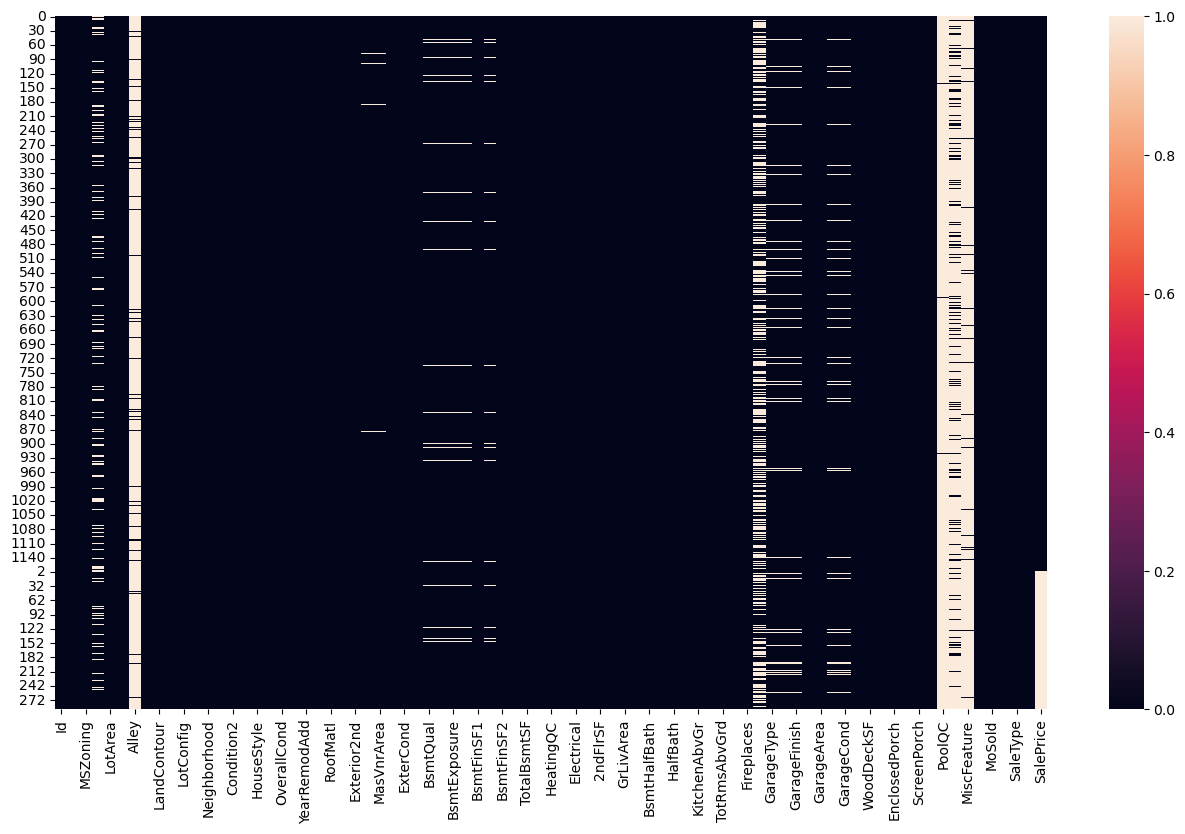

In [20]:
plt.figure(figsize=(16,9))
sns.heatmap(df.isnull())
plt.savefig("House_img")

# Get the null value percentage for every feature

In [21]:
#set index as Id columns
df.set_index("Id")

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
Id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
127,120,RL,NaN,4928,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,NPkVill,Norm,Norm,TwnhsE,1Story,6,5,1976,1976,Gable,CompShg,Plywood,Plywood,None,0.0,TA,TA,CBlock,Gd,TA,No,ALQ,120,Unf,0,958,1078,GasA,TA,Y,SBrkr,958,0,0,958,0,0,2,0,2,1,TA,5,Typ,1,TA,Attchd,1977.0,RFn,2,440,TA,TA,Y,0,205,0,0,0,0,NaN,NaN,NaN,0,2,2007,WD,Normal,128000.0
889,20,RL,95.0,15865,Pave,NaN,IR1,Lvl,AllPub,Inside,Mod,NAmes,Norm,Norm,1Fam,1Story,8,6,1970,1970,Flat,Tar&Grv,Wd Sdng,Wd Sdng,None,0.0,Gd,Gd,PConc,TA,Gd,Gd,ALQ,351,Rec,823,1043,2217,GasA,Ex,Y,SBrkr,2217,0,0,2217,1,0,2,0,4,1,Gd,8,Typ,1,TA,Attchd,1970.0,Unf,2,621,TA,TA,Y,81,207,0,0,224,0,NaN,NaN,NaN,0,10,2007,WD,Normal,268000.0
793,60,RL,92.0,9920,Pave,NaN,IR1,Lvl,AllPub,CulDSac,Gtl,NoRidge,Norm,Norm,1Fam,2Story,7,5,1996,1997,Gable,CompShg,MetalSd,MetalSd,None,0.0,Gd,TA,PConc,Gd,TA,Av,GLQ,862,Unf,0,255,1117,GasA,Ex,Y,SBrkr,1127,886,0,2013,1,0,2,1,3,1,TA,8,Typ,1,TA,Attchd,1997.0,Unf,2,455,TA,TA,Y,180,130,0,0,0,0,NaN,NaN,NaN,0,6,2007,WD,Normal,269790.0
110,20,RL,105.0,11751,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,NWAmes,Norm,Norm,1Fam,1Story,6,6,1977,1977,Hip,CompShg,Plywood,Plywood,BrkFace,480.0,TA,TA,CBlock,Gd,TA,No,BLQ,705,Unf,0,1139,1844,GasA,Ex,Y,SBrkr,1844,0,0,1844,0,0,2,0,3,1,TA,7,Typ,1,TA,Attchd,1977.0,RFn,2,546,TA,TA,Y,0,122,0,0,0,0,NaN,MnPrv,NaN,0,1,2010,COD,Normal,190000.0
422,20,RL,NaN,16635,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NWAmes,Norm,Norm,1Fam,1Story,6,7,1977,2000,Gable,CompShg,CemntBd,CmentBd,Stone,126.0,Gd,TA,CBlock,Gd,TA,No,ALQ,1246,Unf,0,356,1602,GasA,Gd,Y,SBrkr,1602,0,0,1602,0,1,2,0,3,1,Gd,8,Typ,1,TA,Attchd,1977.0,Fin,2,529,TA,TA,Y,240,0,0,0,0,0,NaN,NaN,NaN,0,6,2009,WD,Normal,215000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
83,20,RL,78.0,10206,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Somerst,Norm,Norm,1Fam,1Story,8,5,2007,2007,Gable,CompShg,VinylSd,VinylSd,Stone,468.0,TA,TA,PConc,Gd,TA,No,GLQ,33,Unf,0,1530,1563,GasA,Ex,Y,SBrkr,1563,0,0,1563,0,0,2,0,3,1,Gd,6,Typ,1,Gd,Attchd,2007.0,RFn,3,758,TA,TA,Y,144,99,0,0,0,0,NaN,NaN,NaN,0,10,2008,WD,Normal,NaN
1048,20,RL,57.0,9245,Pave,NaN,IR2,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,1Story,5,5,1994,1995,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,PConc,Gd,TA,No,GLQ,686,Unf,0,304,990,GasA,Ex,Y,SBrkr,990,0,0,990,0,1,1,0,3,1,TA,5,Typ,0,NaN,Detchd,1996.0,Unf,2,672,TA,TA,Y,0,0,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,NaN
17,20,RL,NaN,11241,Pave,NaN,IR1,Lvl,AllPub,CulDSac,Gtl,NAmes,Norm,Norm,1Fam,1Story,6,7,1970,1970,Gable,CompShg,Wd Sdng,Wd Sdng,BrkFace,180.0,TA,TA,CBlock,TA,TA,No,ALQ,578,Unf,0,426,1004,GasA,Ex,Y,SBrkr,1004,0,0,1004,1,0,1,0,2,1,TA,5,Typ,1,TA,Attchd,1970.0,Fin,2,480,TA,TA,Y,0,0,0,0,0,0,NaN,NaN,Shed,700,3,2010,WD,Normal,NaN


In [22]:
null_count = df.isnull().sum()
null_count

Id                 0
MSSubClass         0
MSZoning           0
LotFrontage      259
LotArea            0
                ... 
MoSold             0
YrSold             0
SaleType           0
SaleCondition      0
SalePrice        292
Length: 81, dtype: int64

In [23]:
null_percent = df.isnull().sum()/df.shape[0]*100
null_percent

Id                0.000000
MSSubClass        0.000000
MSZoning          0.000000
LotFrontage      17.739726
LotArea           0.000000
                   ...    
MoSold            0.000000
YrSold            0.000000
SaleType          0.000000
SaleCondition     0.000000
SalePrice        20.000000
Length: 81, dtype: float64

# Drop Columns/Features
As per observation , we will not drop any feature from dataset

In [24]:
# """As per domain knowledge we will not drop those features, insead None value we will add constant value NA""""
miss_value_50_perc = null_percent[null_percent>50]
miss_value_50_perc 

Alley          93.767123
PoolQC         99.520548
Fence          80.753425
MiscFeature    96.301370
dtype: float64

In [25]:
df["Alley"].value_counts()

Grvl    50
Pave    41
Name: Alley, dtype: int64

In [26]:
df["PoolQC"].value_counts()

Gd    3
Ex    2
Fa    2
Name: PoolQC, dtype: int64

In [27]:
df["Fence"].value_counts()

MnPrv    157
GdPrv     59
GdWo      54
MnWw      11
Name: Fence, dtype: int64

In [28]:
df["MiscFeature"].value_counts()

Shed    49
Gar2     2
Othr     2
TenC     1
Name: MiscFeature, dtype: int64

In [29]:
# """As per domain knowledge we will not drop FireplaceQu features, insead None value we will add constant value 'NA' """"
miss_value_20_50_perc = null_percent[(null_percent>20) & (null_percent<51)]
miss_value_20_50_perc 

FireplaceQu    47.260274
dtype: float64

In [30]:
# """As per domain knowledge we will not drop FireplaceQu features, insead None value we will add constant value 'NA' """"
miss_value_5_20_perc = null_percent[(null_percent>5) & (null_percent<21)]
miss_value_5_20_perc 

LotFrontage     17.739726
GarageType       5.547945
GarageYrBlt      5.547945
GarageFinish     5.547945
GarageQual       5.547945
GarageCond       5.547945
SalePrice       20.000000
dtype: float64

In [31]:
df["LotFrontage"].value_counts().head()

60.0    143
70.0     70
80.0     69
50.0     57
75.0     53
Name: LotFrontage, dtype: int64

<Axes: >

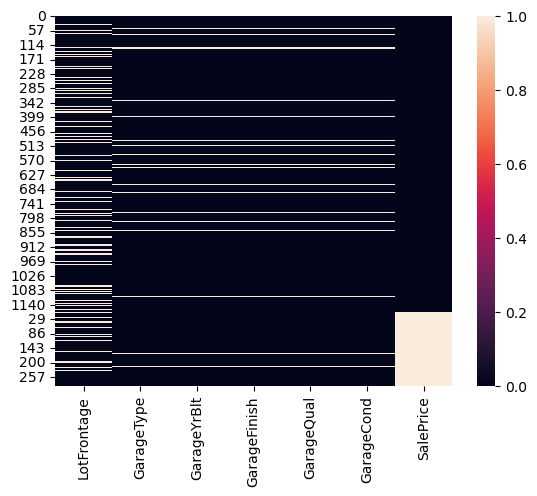

In [32]:
sns.heatmap(df[miss_value_5_20_perc.keys()].isnull())

# Missing Value Imputation

In [33]:
missing_value_feat = null_percent[null_percent>0]
print("Total Missing Value Features =", len(missing_value_feat))

Total Missing Value Features = 20


In [34]:
missing_value_feat

LotFrontage     17.739726
Alley           93.767123
MasVnrType       0.547945
MasVnrArea       0.547945
BsmtQual         2.534247
BsmtCond         2.534247
BsmtExposure     2.602740
BsmtFinType1     2.534247
BsmtFinType2     2.602740
Electrical       0.068493
FireplaceQu     47.260274
GarageType       5.547945
GarageYrBlt      5.547945
GarageFinish     5.547945
GarageQual       5.547945
GarageCond       5.547945
PoolQC          99.520548
Fence           80.753425
MiscFeature     96.301370
SalePrice       20.000000
dtype: float64

In [35]:
categorical_na_feat = missing_value_feat[missing_value_feat.keys().isin(categorical_features)]
print("Total Number of Categorical Missing Features=", len(categorical_na_feat))
categorical_na_feat

Total Number of Categorical Missing Features= 16


Alley           93.767123
MasVnrType       0.547945
BsmtQual         2.534247
BsmtCond         2.534247
BsmtExposure     2.602740
BsmtFinType1     2.534247
BsmtFinType2     2.602740
Electrical       0.068493
FireplaceQu     47.260274
GarageType       5.547945
GarageFinish     5.547945
GarageQual       5.547945
GarageCond       5.547945
PoolQC          99.520548
Fence           80.753425
MiscFeature     96.301370
dtype: float64

In [36]:
int_na_feat = missing_value_feat[missing_value_feat.keys().isin(int_features)]
print("Total Number of Integer Missing Features=", len(int_na_feat))
int_na_feat

Total Number of Integer Missing Features= 0


Series([], dtype: float64)

In [37]:
float_na_feat = missing_value_feat[missing_value_feat.keys().isin(float_features)]
print("Total Number of Floating Missing Features=", len(categorical_na_feat))
float_na_feat

Total Number of Floating Missing Features= 16


LotFrontage    17.739726
MasVnrArea      0.547945
GarageYrBlt     5.547945
SalePrice      20.000000
dtype: float64

# Handling LotFrontage   = 17.739726

In [38]:
df["LotFrontage"].value_counts()

60.0     143
70.0      70
80.0      69
50.0      57
75.0      53
        ... 
46.0       1
141.0      1
152.0      1
160.0      1
150.0      1
Name: LotFrontage, Length: 110, dtype: int64

<Axes: ylabel='count'>

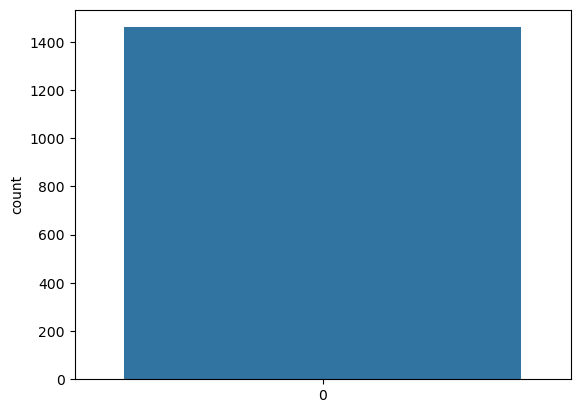

In [39]:
sns.countplot(df["LotFrontage"].index)

In [40]:
### Backup of Original data
df_mvi  = df.copy()
df_mvi.shape

(1460, 81)

In [41]:
LotFrontage_mode = df["LotFrontage"].mode()[0]
df_mvi["LotFrontage"].replace(np.nan, LotFrontage_mode, inplace=True)
df_mvi["LotFrontage"].isnull().sum()

0

In [42]:
def oldNewCountPlot(df, df_new, feature):
    plt.subplot(121)
    sns.countplot(df["LotFrontage"].index)
    plt.title("Old Data Distribution")
    plt.subplot(122)
    sns.countplot(df_new["LotFrontage"].index)
    plt.title("New Data Distribution")

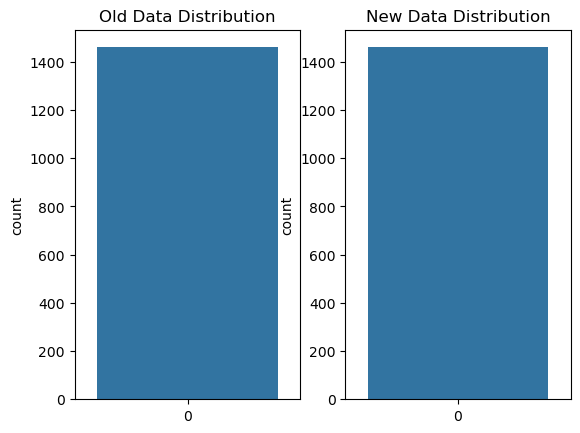

In [43]:
oldNewCountPlot(df, df_mvi, "LotFrontage")

# Handling Alley = 93.767123

In [44]:
df_mvi["Alley"].value_counts()

Grvl    50
Pave    41
Name: Alley, dtype: int64

In [45]:
Alley_cont = "NA"
df_mvi["Alley"].replace(np.nan, Alley_cont, inplace = True)
df_mvi["Alley"].isnull().sum()

0

In [46]:
def oldNewCountPlot(df, df_new, feature):
    plt.subplot(121)
    sns.countplot(df[feature].index)
    plt.title("Old Data Distribution")
    plt.subplot(122)
    sns.countplot(df_new[feature].index)
    plt.title("New Data Distribution")

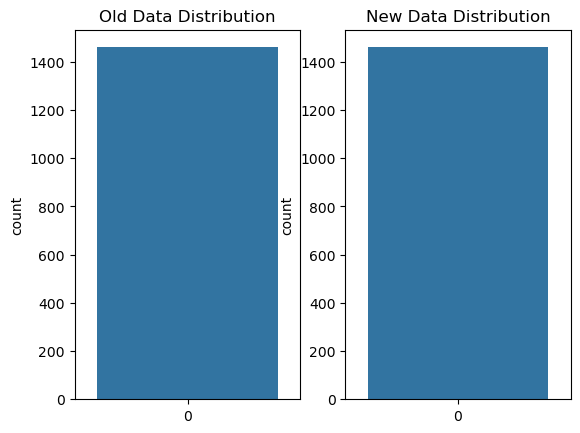

In [47]:
oldNewCountPlot(df, df_mvi, "Alley")

# Handling LotFrontage   = 17.739726

In [48]:
def boxHistPlot(df, figsize=(16, 5)):
    plt.figure(figsize=figsize)
    plt.subplot(121)
    sns.boxplot(df)
    plt.subplot(122)
    sns.distplot(df)

C:\Users\gk521\AppData\Local\Temp\ipykernel_13740\180669257.py:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df)


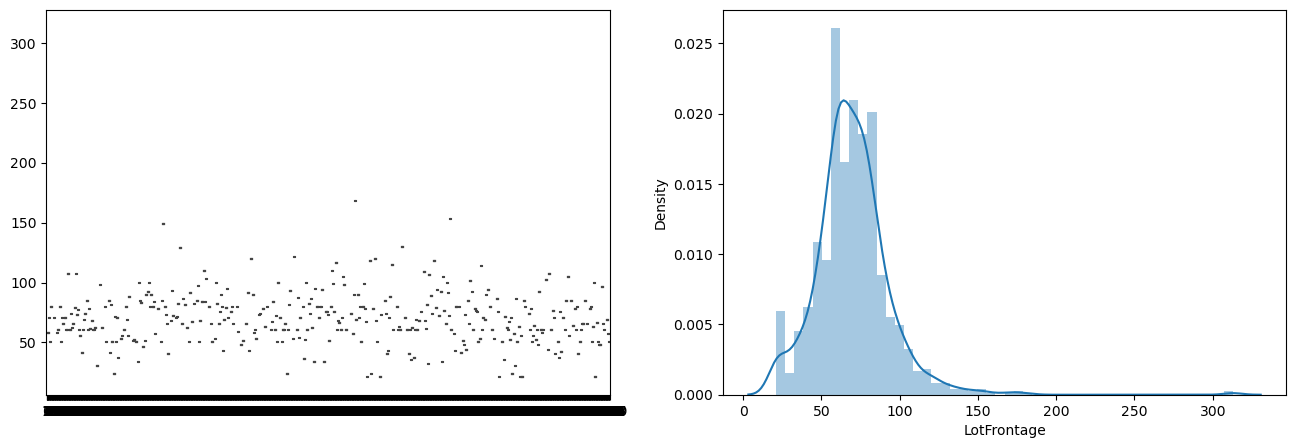

In [49]:
boxHistPlot(df["LotFrontage"])

In [50]:
lotfrontage_mean = df["LotFrontage"].mean()
lotfrontage_mean

70.04995836802665

In [51]:
lotfrontage_mean = df["LotFrontage"].mean()
df_mvi["LotFrontage"].replace(np.nan, lotfrontage_mean, inplace = True)
df_mvi["LotFrontage"].isnull().sum()

0

In [52]:
def oldNewBoxHistPlot(df, df_new, feature):
    plt.subplot(221)
    sns.boxplot(df[feature].index)
    plt.title("Old Data Distribution")
    plt.subplot(222)
    sns.distplot(df[feature].index)
    plt.title("Old Data Distribution")
    
    plt.subplot(223)
    sns.boxplot(df_new[feature].index)
    plt.title("New Data Distribution")
    plt.subplot(224)
    sns.distplot(df_new[feature].index)
    plt.title("New Data Distribution")

C:\Users\gk521\AppData\Local\Temp\ipykernel_13740\414266027.py:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[feature].index)
C:\Users\gk521\AppData\Local\Temp\ipykernel_13740\414266027.py:13: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_new[feature].index)


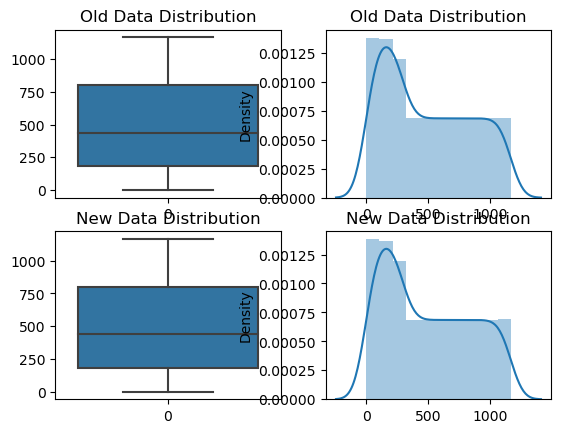

In [53]:
oldNewBoxHistPlot(df, df_mvi, "LotFrontage")

# Handling MasVnrType = 0.547945

In [54]:
df["MasVnrType"].value_counts()

None       864
BrkFace    445
Stone      128
BrkCmn      15
Name: MasVnrType, dtype: int64

In [55]:
MasVnrType_mode = df["MasVnrType"].mode()[0]
df_mvi["MasVnrType"].replace(np.nan, MasVnrType_mode, inplace=True)
df_mvi["MasVnrType"].isnull().sum()

0

# Handling Exterior1st = 0.034258 Exterior2nd = 0.034258

In [56]:
df["Exterior1st"].value_counts()

VinylSd    515
HdBoard    222
MetalSd    220
Wd Sdng    206
Plywood    108
CemntBd     61
BrkFace     50
WdShing     26
Stucco      25
AsbShng     20
Stone        2
BrkComm      2
AsphShn      1
ImStucc      1
CBlock       1
Name: Exterior1st, dtype: int64

In [57]:
df["Exterior2nd"].value_counts()

VinylSd    504
MetalSd    214
HdBoard    207
Wd Sdng    197
Plywood    142
CmentBd     60
Wd Shng     38
Stucco      26
BrkFace     25
AsbShng     20
ImStucc     10
Brk Cmn      7
Stone        5
AsphShn      3
Other        1
CBlock       1
Name: Exterior2nd, dtype: int64

In [58]:
Exterior1st_mode = df["Exterior1st"].mode()[0]
Exterior2nd_mode = df["Exterior2nd"].mode()[0]
df_mvi["Exterior1st"].replace(np.nan, Exterior1st_mode, inplace=True)
df_mvi["Exterior2nd"].replace(np.nan, Exterior2nd_mode, inplace=True)
print("E1st is null:", df_mvi["Exterior1st"].isnull().sum())
print("E2nd is null:", df_mvi["Exterior2nd"].isnull().sum())

E1st is null: 0
E2nd is null: 0


In [59]:
df["Exterior1st"].mode()[0]

'VinylSd'

# Handling MasVnrType = 0.547945 MasVnrArea = 0.547945

<Axes: >

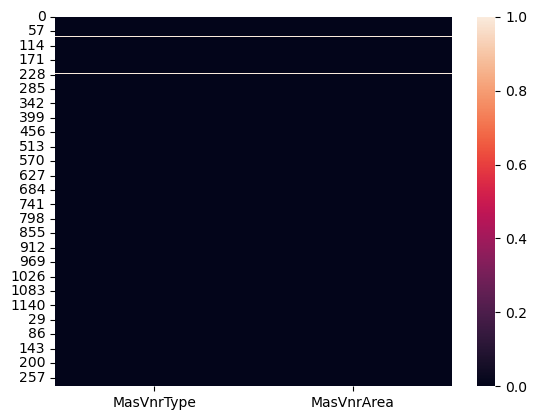

In [60]:
sns.heatmap(df[["MasVnrType", "MasVnrArea"]].isnull())

In [61]:
df[df[["MasVnrType", "MasVnrArea"]].isnull().any(axis=1)]

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,...,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
68,530,20,RL,NaN,32668,Pave,NaN,IR1,Lvl,AllPub,CulDSac,Gtl,Crawfor,Norm,Norm,1Fam,1Story,6,3,1957,1975,Hip,CompShg,Wd Sdng,Stone,NaN,NaN,Gd,TA,PConc,TA,TA,No,Rec,1219,Unf,0,816,2035,GasA,...,Y,SBrkr,2515,0,0,2515,1,0,3,0,4,2,TA,9,Maj1,2,TA,Attchd,1975.0,RFn,2,484,TA,TA,Y,0,0,200,0,0,0,NaN,NaN,NaN,0,3,2007,WD,Alloca,200624.0
78,1244,20,RL,107.0,13891,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NridgHt,Norm,Norm,1Fam,1Story,10,5,2006,2006,Gable,CompShg,VinylSd,VinylSd,NaN,NaN,Ex,TA,PConc,Ex,Gd,Gd,GLQ,1386,Unf,0,690,2076,GasA,...,Y,SBrkr,2076,0,0,2076,1,0,2,1,2,1,Ex,7,Typ,1,Gd,Attchd,2006.0,Fin,3,850,TA,TA,Y,216,229,0,0,0,0,NaN,NaN,NaN,0,9,2006,New,Partial,465000.0
99,651,60,FV,65.0,8125,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Somerst,Norm,Norm,1Fam,2Story,7,6,2007,2007,Gable,CompShg,CemntBd,CmentBd,NaN,NaN,Gd,TA,PConc,Gd,TA,No,Unf,0,Unf,0,813,813,GasA,...,Y,SBrkr,822,843,0,1665,0,0,2,1,3,1,Gd,7,Typ,0,NaN,Attchd,2007.0,RFn,2,562,TA,TA,Y,0,0,0,0,0,0,NaN,NaN,NaN,0,5,2008,WD,Normal,205950.0
185,974,20,FV,95.0,11639,Pave,NaN,Reg,Lvl,AllPub,Corner,Gtl,Somerst,Norm,Norm,1Fam,1Story,7,5,2007,2008,Gable,CompShg,CemntBd,CmentBd,NaN,NaN,Gd,TA,PConc,Gd,TA,No,Unf,0,Unf,0,1428,1428,GasA,...,Y,SBrkr,1428,0,0,1428,0,0,2,0,3,1,Gd,6,Typ,0,NaN,Attchd,2007.0,Fin,2,480,TA,TA,Y,0,120,0,0,0,0,NaN,NaN,NaN,0,12,2008,New,Partial,182000.0
224,978,120,FV,35.0,4274,Pave,Pave,IR1,Lvl,AllPub,Inside,Gtl,Somerst,Norm,Norm,TwnhsE,1Story,7,5,2006,2007,Gable,CompShg,VinylSd,VinylSd,NaN,NaN,Gd,TA,PConc,Gd,TA,No,GLQ,1106,Unf,0,135,1241,GasA,...,Y,SBrkr,1241,0,0,1241,1,0,1,1,1,1,Gd,4,Typ,0,NaN,Attchd,2007.0,Fin,2,569,TA,TA,Y,0,116,0,0,0,0,NaN,NaN,NaN,0,11,2007,New,Partial,199900.0
367,1279,60,RL,75.0,9473,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,8,5,2002,2002,Gable,CompShg,VinylSd,VinylSd,NaN,NaN,Gd,TA,PConc,Gd,TA,No,GLQ,804,Unf,0,324,1128,GasA,...,Y,SBrkr,1128,903,0,2031,1,0,2,1,3,1,Gd,7,Typ,1,Gd,Attchd,2002.0,RFn,2,577,TA,TA,Y,0,211,0,0,0,0,NaN,NaN,NaN,0,3,2008,WD,Normal,237000.0
874,235,60,RL,NaN,7851,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,6,5,2002,2002,Gable,CompShg,VinylSd,VinylSd,NaN,NaN,Gd,TA,PConc,Gd,TA,No,GLQ,625,Unf,0,235,860,GasA,...,Y,SBrkr,860,1100,0,1960,1,0,2,1,4,1,Gd,8,Typ,2,TA,BuiltIn,2002.0,Fin,2,440,TA,TA,Y,288,48,0,0,0,0,NaN,NaN,NaN,0,5,2010,WD,Normal,216500.0
31,937,20,RL,67.0,10083,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,SawyerW,Norm,Norm,1Fam,1Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,NaN,NaN,Gd,TA,PConc,Gd,TA,No,GLQ,833,Unf,0,343,1176,GasA,...,Y,SBrkr,1200,0,0,1200,1,0,2,0,2,1,Gd,5,Typ,0,NaN,Attchd,2003.0,RFn,2,555,TA,TA,Y,0,41,0,0,0,0,NaN,NaN,NaN,0,8,2009,WD,Normal,NaN


In [62]:
df["MasVnrType"].value_counts()

None       864
BrkFace    445
Stone      128
BrkCmn      15
Name: MasVnrType, dtype: int64

In [63]:
MasVnrType_mode = df["MasVnrType"].mode()[0]
df_mvi["MasVnrType"].replace(np.nan, MasVnrType_mode, inplace=True)
df_mvi["MasVnrType"].isnull().sum()

0

C:\Users\gk521\AppData\Local\Temp\ipykernel_13740\180669257.py:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df)


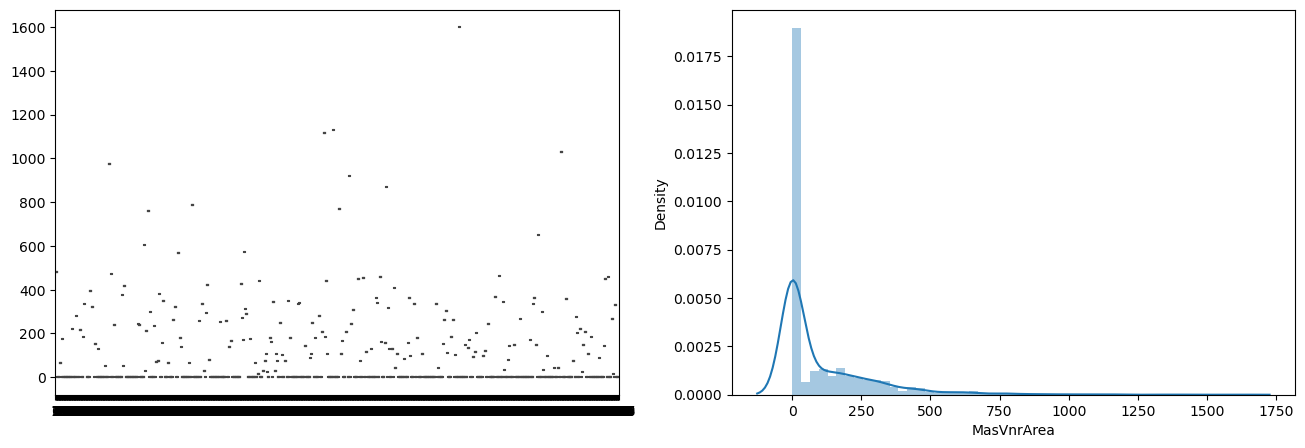

In [64]:
boxHistPlot(df["MasVnrArea"])

In [65]:
MasVnrArea_cont = 0
df_mvi["MasVnrArea"].replace(np.nan, MasVnrArea_cont, inplace=True)
df_mvi["MasVnrArea"].isnull().sum()

0

Handling Bsmt Features

In [66]:
"""cat_bsmt_feat = 
BsmtQual         2.534247
BsmtCond         2.534247
BsmtExposure     2.602740
BsmtFinType1     2.534247
BsmtFinType2     2.602740
"""

'cat_bsmt_feat = \nBsmtQual         2.534247\nBsmtCond         2.534247\nBsmtExposure     2.602740\nBsmtFinType1     2.534247\nBsmtFinType2     2.602740\n'

In [67]:
cat_bsmt_feat = ["BsmtQual",      
"BsmtCond",
"BsmtExposure", 
"BsmtFinType1",   
"BsmtFinType2"]   

<Axes: >

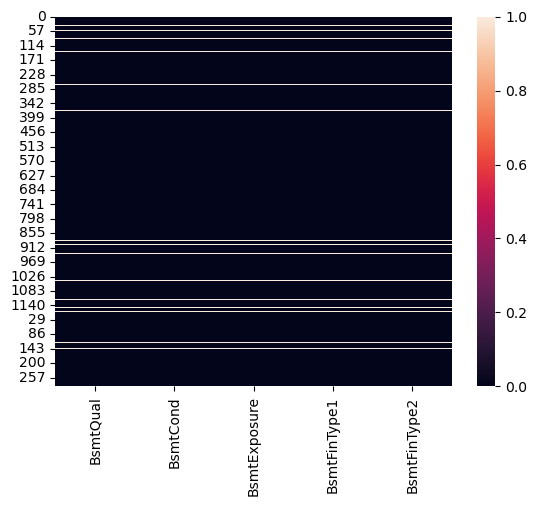

In [68]:
sns.heatmap(df[cat_bsmt_feat].isnull())

In [69]:
for feat in cat_bsmt_feat:
    print(f"Value count of {feat}: {df[feat].value_counts()}")

Value count of BsmtQual: TA    649
Gd    618
Ex    121
Fa     35
Name: BsmtQual, dtype: int64
Value count of BsmtCond: TA    1311
Gd      65
Fa      45
Po       2
Name: BsmtCond, dtype: int64
Value count of BsmtExposure: No    953
Av    221
Gd    134
Mn    114
Name: BsmtExposure, dtype: int64
Value count of BsmtFinType1: Unf    430
GLQ    418
ALQ    220
BLQ    148
Rec    133
LwQ     74
Name: BsmtFinType1, dtype: int64
Value count of BsmtFinType2: Unf    1256
Rec      54
LwQ      46
BLQ      33
ALQ      19
GLQ      14
Name: BsmtFinType2, dtype: int64


In [70]:
bsmt_cont = "NA"
for feat in cat_bsmt_feat:
    df_mvi[feat].replace(np.nan, bsmt_cont, inplace = True)

In [71]:
df_mvi[cat_bsmt_feat].isnull().sum()

BsmtQual        0
BsmtCond        0
BsmtExposure    0
BsmtFinType1    0
BsmtFinType2    0
dtype: int64

Handling Electrical = 0.068493

In [72]:
df["Electrical"].value_counts()

SBrkr    1334
FuseA      94
FuseF      27
FuseP       3
Mix         1
Name: Electrical, dtype: int64

In [73]:
df["Electrical"].isnull()

0      False
1      False
2      False
3      False
4      False
       ...  
287    False
288    False
289    False
290    False
291    False
Name: Electrical, Length: 1460, dtype: bool

In [74]:
Electrical_mode = df["Electrical"].mode()[0]
df_mvi["Electrical"].replace(np.nan, Electrical_mode, inplace=True)
df_mvi["Electrical"].isnull().sum()

0

Handling remaining cat features

FireplaceQu     47.260274 mode

In [75]:
df["FireplaceQu"].value_counts()

Gd    380
TA    313
Fa     33
Ex     24
Po     20
Name: FireplaceQu, dtype: int64

In [76]:
FireplaceQu_mode = df["FireplaceQu"].mode()[0]
df_mvi["FireplaceQu"].replace(np.nan, FireplaceQu_mode, inplace=True)
df_mvi["FireplaceQu"].isnull().sum()

0

In [77]:
other_cat_feat = ["PoolQC",
"Fence",           
"MiscFeature"]
for feat in other_cat_feat:
    print(f"Value count of {feat}: {df[feat].value_counts()}")

Value count of PoolQC: Gd    3
Ex    2
Fa    2
Name: PoolQC, dtype: int64
Value count of Fence: MnPrv    157
GdPrv     59
GdWo      54
MnWw      11
Name: Fence, dtype: int64
Value count of MiscFeature: Shed    49
Gar2     2
Othr     2
TenC     1
Name: MiscFeature, dtype: int64


In [78]:
PoolQC_cont = "NA"
df_mvi["PoolQC"].replace(np.nan, PoolQC_cont, inplace=True)
df_mvi["PoolQC"].isnull().sum()

0

In [79]:
Fence_cont = "NA"
df_mvi["Fence"].replace(np.nan, Fence_cont, inplace=True)
df_mvi["Fence"].isnull().sum()

0

In [80]:
MiscFeature_cont = "NA"
df_mvi["MiscFeature"].replace(np.nan, MiscFeature_cont, inplace=True)
df_mvi["MiscFeature"].isnull().sum()

0

# Handling Remaining Garage cat features

In [81]:
cat_Garage_feat = ["GarageType", "GarageFinish", "GarageQual", "GarageCond"]
df_garage = df[cat_Garage_feat]
df_garage[df_garage.isnull().any(axis=1)]

,GarageType,GarageFinish,GarageQual,GarageCond
48,NaN,NaN,NaN,NaN
72,NaN,NaN,NaN,NaN
74,NaN,NaN,NaN,NaN
105,NaN,NaN,NaN,NaN
116,NaN,NaN,NaN,NaN
...,...,...,...,...
214,NaN,NaN,NaN,NaN
215,NaN,NaN,NaN,NaN
217,NaN,NaN,NaN,NaN
218,NaN,NaN,NaN,NaN


In [82]:
Garage_cont = "NA"
for feat in cat_Garage_feat:
    df_mvi[feat].replace(np.nan, Garage_cont, inplace = True)
    
df_mvi[cat_Garage_feat].isnull().sum()

GarageType      0
GarageFinish    0
GarageQual      0
GarageCond      0
dtype: int64

In [83]:
df_mvi.isnull().any(axis=1).sum()

356

# Feature Transformation 

# Convert Numerical Feature to Categorical Feature

In [84]:
for_num_conv = ["MSSubClass", "YearBuilt", "YearRemodAdd", "GarageYrBlt", "MoSold", "YrSold"]
for feat in for_num_conv:
    print(f"{feat}: data type = {df_mvi[feat].dtype}")

MSSubClass: data type = int64
YearBuilt: data type = int64
YearRemodAdd: data type = int64
GarageYrBlt: data type = float64
MoSold: data type = int64
YrSold: data type = int64


In [85]:
df_mvi[for_num_conv].head()

,MSSubClass,YearBuilt,YearRemodAdd,GarageYrBlt,MoSold,YrSold
0,120,1976,1976,1977.0,2,2007
1,20,1970,1970,1970.0,10,2007
2,60,1996,1997,1997.0,6,2007
3,20,1977,1977,1977.0,1,2010
4,20,1977,2000,1977.0,6,2009


In [86]:
df_mvi["MoSold"].unique()

array([ 2, 10,  6,  1, 11,  5,  4,  7,  8,  3,  9, 12], dtype=int64)

In [87]:
calendar.month_abbr[12]

'Dec'

In [88]:
# df_mvi["MoSold"] = df_mvi["MoSold"].apply(lambda x : calendar.month_abbr[x])
# df_mvi["MoSold"].unique()

In [89]:
for feat in for_num_conv:
    df_mvi[feat] = df_mvi[feat].astype(str)

In [90]:
for feat in for_num_conv:
    print(f"{feat}: data type = {df_mvi[feat].dtype}")

MSSubClass: data type = object
YearBuilt: data type = object
YearRemodAdd: data type = object
GarageYrBlt: data type = object
MoSold: data type = object
YrSold: data type = object


# Convert Categorical into Feature Numerical Feature 

# Ordinal Encoding

In [91]:
ordinal_end_var = [
"ExterQual",
"ExterCond",
"BsmtQual",
"BsmtExposure",
"BsmtFinType1", 
"BsmtFinSF1",
"BsmtFinType2",
"HeatingQC",
"KitchenQual",
"FireplaceQu",
"GarageQual",
"GarageCond",
"PoolQC",
"Functional",
"GarageFinish",
"PavedDrive",
"Utilities"
]

print("Total Number of Features to Convert Ordinal Numerical Format:", len(ordinal_end_var))

Total Number of Features to Convert Ordinal Numerical Format: 17


In [92]:
df_mvi["ExterQual"].unique()

array(['TA', 'Gd', 'Ex', 'Fa'], dtype=object)

In [93]:
df_mvi["ExterQual"].value_counts()

TA    906
Gd    488
Ex     52
Fa     14
Name: ExterQual, dtype: int64

In [94]:
df_mvi["ExterQual"] = df_mvi["ExterQual"].astype(CategoricalDtype(categories=["Po", "Fa", "TA", "Gd", "Ex"], ordered=True)).cat.codes

In [95]:
df_mvi["ExterQual"].value_counts()

2    906
3    488
4     52
1     14
Name: ExterQual, dtype: int64

In [96]:
df_mvi["BsmtExposure"].unique()

array(['No', 'Gd', 'Av', 'Mn', 'NA'], dtype=object)

In [97]:
df_mvi["BsmtExposure"].value_counts()

No    953
Av    221
Gd    134
Mn    114
NA     38
Name: BsmtExposure, dtype: int64

In [98]:
df_mvi["BsmtExposure"] = df_mvi["BsmtExposure"].astype(CategoricalDtype(categories=["No", "Av", "Gd", "Mn", "NA"], ordered=True)).cat.codes

In [99]:
df_mvi["BsmtExposure"].value_counts()

0    953
1    221
2    134
3    114
4     38
Name: BsmtExposure, dtype: int64

In [100]:
df_mvi["ExterCond"] = df_mvi["ExterCond"].astype(CategoricalDtype(categories=["TA", "Gd", "Fa", "Po", "Ex"], ordered=True)).cat.codes

df_mvi["BsmtQual"] = df_mvi["BsmtQual"].astype(CategoricalDtype(categories=["Gd", "TA", "Ex", "NA", "Fa"], ordered=True)).cat.codes

df_mvi["BsmtFinType1"] = df_mvi["BsmtFinType1"].astype(CategoricalDtype(categories=["ALQ", "GLQ", "BLQ", "Unf" "Rec", "LwQ", "NA"], ordered=True)).cat.codes

df_mvi["BsmtFinType2"] = df_mvi["BsmtFinType2"].astype(CategoricalDtype(categories=["Unf", "Rec", "BLQ", "GLQ", "NA", "ALQ", "LwQ"], ordered=True)).cat.codes

df_mvi["HeatingQC"] = df_mvi["HeatingQC"].astype(CategoricalDtype(categories=["TA", "Ex", "Gd", "Fa", "Po"], ordered=True)).cat.codes

df_mvi["KitchenQual"] = df_mvi["KitchenQual"].astype(CategoricalDtype(categories=["TA", "Gd", "Ex", "Fa"], ordered=True)).cat.codes

df_mvi["FireplaceQu"] = df_mvi["FireplaceQu"].astype(CategoricalDtype(categories=["TA", "Gd", "Fa", "Ex", "Po"], ordered=True)).cat.codes

df_mvi["GarageQual"] = df_mvi["GarageQual"].astype(CategoricalDtype(categories=["TA", "Fa", "NA", "Gd", "Ex", "Po"], ordered=True)).cat.codes

df_mvi["GarageCond"] = df_mvi["GarageCond"].astype(CategoricalDtype(categories=["TA", "Fa", "Gd", "NA", "Po", "Ex"], ordered=True)).cat.codes

df_mvi["PoolQC"] = df_mvi["PoolQC"].astype(CategoricalDtype(categories=["NA", "Ex", "Gd", "Fa"], ordered=True)).cat.codes

df_mvi["Functional"] = df_mvi["Functional"].astype(CategoricalDtype(categories=["Typ", "Mod", "Maj1", "Min1", "Min2", "Sev", "Maj2"], ordered=True)).cat.codes

df_mvi["GarageFinish"] = df_mvi["GarageFinish"].astype(CategoricalDtype(categories=["RFn", "Unf", "Fin", "NA"], ordered=True)).cat.codes

df_mvi["PavedDrive"] = df_mvi["PavedDrive"].astype(CategoricalDtype(categories=["Y", "N", "P"], ordered=True)).cat.codes

df_mvi["Utilities"] = df_mvi["Utilities"].astype(CategoricalDtype(categories=["AllPub", "NoSeWa"], ordered=True)).cat.codes

In [101]:
df_mvi.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1460 entries, 0 to 291
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   object 
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1460 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          1460 non-null   object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   int8   
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallCo

# One Hot Encoding for Nominal Categorical Data

In [102]:
df_encod = df_mvi.copy()

object_features = df_encod.select_dtypes(include="object").columns.tolist()
print("Total Object Data Type Features:", len(object_features))

print("Features: \n", object_features)

Total Object Data Type Features: 33
Features: 
 ['MSSubClass', 'MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'YearBuilt', 'YearRemodAdd', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'Foundation', 'BsmtCond', 'Heating', 'CentralAir', 'Electrical', 'GarageType', 'GarageYrBlt', 'Fence', 'MiscFeature', 'MoSold', 'YrSold', 'SaleType', 'SaleCondition']


In [103]:
df_encod[object_features].head(2)

,MSSubClass,MSZoning,Street,Alley,LotShape,LandContour,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,Foundation,BsmtCond,Heating,CentralAir,Electrical,GarageType,GarageYrBlt,Fence,MiscFeature,MoSold,YrSold,SaleType,SaleCondition
0,120,RL,Pave,NA,IR1,Lvl,Inside,Gtl,NPkVill,Norm,Norm,TwnhsE,1Story,1976,1976,Gable,CompShg,Plywood,Plywood,None,CBlock,TA,GasA,Y,SBrkr,Attchd,1977.0,NA,NA,2,2007,WD,Normal
1,20,RL,Pave,NA,IR1,Lvl,Inside,Mod,NAmes,Norm,Norm,1Fam,1Story,1970,1970,Flat,Tar&Grv,Wd Sdng,Wd Sdng,None,PConc,Gd,GasA,Y,SBrkr,Attchd,1970.0,NA,NA,10,2007,WD,Normal


In [104]:
df_encod = pd.get_dummies(df_encod, columns=object_features, prefix=object_features, drop_first=True)

In [149]:
# print("Shape of DF before encoding:", df_encod.shape)
# df_encod = pd.get_dummies(df_encod, 
#                           columns=object_features, 
#                           prefix=object_features, 
#                           drop_first=True)
# print("Shape of DF After encoding:", df_encod.shape)

In [150]:
df_encod.head(2)

,Id,LotFrontage,LotArea,Utilities,OverallQual,OverallCond,MasVnrArea,ExterQual,ExterCond,BsmtQual,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,HeatingQC,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,...,GarageYrBlt_2008.0,GarageYrBlt_2009.0,GarageYrBlt_2010.0,GarageYrBlt_nan,Fence_GdWo,Fence_MnPrv,Fence_MnWw,Fence_NA,MiscFeature_NA,MiscFeature_Othr,MiscFeature_Shed,MiscFeature_TenC,MoSold_10,MoSold_11,MoSold_12,MoSold_2,MoSold_3,MoSold_4,MoSold_5,MoSold_6,MoSold_7,MoSold_8,MoSold_9,YrSold_2007,YrSold_2008,YrSold_2009,YrSold_2010,SaleType_CWD,SaleType_Con,SaleType_ConLD,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,127,60.0,4928,0,6,5,0.0,2,0,0,0,0,120,0,0,958,1078,0,958,0,0,958,0,0,2,0,2,1,0,5,0,1,0,0,2,440,0,0,0,0,...,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0
1,889,95.0,15865,0,8,6,0.0,3,1,1,2,0,351,1,823,1043,2217,1,2217,0,0,2217,1,0,2,0,4,1,1,8,0,1,0,1,2,621,0,0,0,81,...,0,0,0,0,0,0,0,1,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0


In [151]:
df_encod.select_dtypes(include="object").columns.tolist()

[]

# Split Data For Training & Testing

In [152]:
df_encod.shape

(1460, 504)

In [153]:
len_train = df_train.shape[0]
len_train

1168

In [154]:
X_train = df_encod[:len_train].drop("SalePrice", axis=1)
y_train = df_encod["SalePrice"][:len_train]
X_test = df_encod[len_train:].drop("SalePrice", axis=1)

print("Shape of X_train Data:", X_train.shape)
print("Shape of y_train Data:", X_train.shape)
print("Shape of X_test Data:", X_train.shape)

Shape of X_train Data: (1168, 503)
Shape of y_train Data: (1168, 503)
Shape of X_test Data: (1168, 503)


# Feature Scaling

In [155]:
sc = StandardScaler()
sc.fit(X_train)
# Formula = z=(x-u)/s 
X_train = sc.transform(X_train)
X_test = sc.transform(X_test)

In [156]:
X_train[:3, :]

array([[-1.43548658, -0.39318669, -0.62061571, ..., -0.12510865,
         0.48577653, -0.31919711],
       [ 0.39632483,  1.14010261,  0.60090318, ..., -0.12510865,
         0.48577653, -0.31919711],
       [ 0.16554544,  1.00867782, -0.06307504, ..., -0.12510865,
         0.48577653, -0.31919711]])

In [157]:
X_test[:3, :]

array([[-0.93065666,  0.74582822,  0.41014207, ..., -0.12510865,
         0.48577653, -0.31919711],
       [ 0.70643463, -0.39318669, -0.52166118, ..., -0.12510865,
        -2.05855973, -0.31919711],
       [ 0.4924829 , -0.39318669,  0.1511403 , ..., -0.12510865,
         0.48577653, -0.31919711]])

In [158]:
sc.mean_

array([7.24136130e+02, 6.89751712e+01, 1.04847491e+04, 0.00000000e+00,
       6.10445205e+00, 5.59589041e+00, 1.01696918e+02, 2.40410959e+00,
       1.54109589e-01, 7.79965753e-01, 6.84075342e-01, 4.31506849e-01,
       4.44726027e+02, 4.88869863e-01, 4.66472603e+01, 5.69721747e+02,
       1.06109503e+03, 9.30650685e-01, 1.16986045e+03, 3.48826199e+02,
       6.38013699e+00, 1.52506678e+03, 4.25513699e-01, 5.56506849e-02,
       1.56250000e+00, 3.88698630e-01, 2.88441781e+00, 1.04537671e+00,
       6.26712329e-01, 6.54280822e+00, 2.20890411e-01, 6.17294521e-01,
       8.87842466e-01, 1.05736301e+00, 1.77654110e+00, 4.76860445e+02,
       1.86643836e-01, 2.26883562e-01, 1.02739726e-01, 9.62063356e+01,
       4.65599315e+01, 2.30154110e+01, 3.63955479e+00, 1.50513699e+01,
       3.44863014e+00, 1.19863014e-02, 4.73150685e+01, 4.02397260e-02,
       5.13698630e-03, 2.22602740e-02, 3.66438356e-01, 4.45205479e-02,
       2.56849315e-03, 8.56164384e-03, 9.67465753e-02, 2.08904110e-01,
      

In [159]:
sc.mean_.shape

(503,)

In [160]:
sc.n_features_in_

503

In [161]:
sc.n_samples_seen_

1168

In [162]:
sc.scale_

array([4.15981688e+02, 2.28267425e+01, 8.95360697e+03, 1.00000000e+00,
       1.38955770e+00, 1.12386178e+00, 1.82140462e+02, 5.77296096e-01,
       4.47845178e-01, 8.85795053e-01, 1.09420320e+00, 1.53289293e+00,
       4.62466684e+02, 1.40444966e+00, 1.63450001e+02, 4.49183114e+02,
       4.42082880e+02, 7.73813003e-01, 3.90994498e+02, 4.39508104e+02,
       5.08710532e+01, 5.27816863e+02, 5.21391457e-01, 2.36597430e-01,
       5.51645654e-01, 5.04713080e-01, 8.16879086e-01, 2.16199731e-01,
       7.26955661e-01, 1.59779910e+00, 8.64546299e-01, 6.50296725e-01,
       6.59692853e-01, 8.62636071e-01, 7.45234418e-01, 2.14374940e+02,
       6.10490234e-01, 7.72424940e-01, 3.62722809e-01, 1.26104970e+02,
       6.63526009e+01, 6.31640322e+01, 2.90764117e+01, 5.50572314e+01,
       4.48777155e+01, 1.65086610e-01, 5.43031821e+02, 1.96520967e-01,
       7.14884443e-02, 1.47528825e-01, 4.81831181e-01, 2.06248561e-01,
       5.06151755e-02, 9.21321990e-02, 2.95612374e-01, 4.06525747e-01,
      

In [163]:
sc.var_

array([1.73040765e+05, 5.21060171e+02, 8.01670777e+07, 0.00000000e+00,
       1.93087059e+00, 1.26306530e+00, 3.31751479e+04, 3.33270783e-01,
       2.00565303e-01, 7.84632876e-01, 1.19728065e+00, 2.34976074e+00,
       2.13875434e+05, 1.97247886e+00, 2.67159030e+04, 2.01765470e+05,
       1.95437273e+05, 5.98786563e-01, 1.52876697e+05, 1.93167373e+05,
       2.58786406e+03, 2.78590641e+05, 2.71849051e-01, 5.59783437e-02,
       3.04312928e-01, 2.54735293e-01, 6.67291442e-01, 4.67423238e-02,
       5.28464534e-01, 2.55296198e+00, 7.47440303e-01, 4.22885831e-01,
       4.35194660e-01, 7.44140992e-01, 5.55374337e-01, 4.59566149e+04,
       3.72698325e-01, 5.96640288e-01, 1.31567836e-01, 1.59024634e+04,
       4.40266764e+03, 3.98969497e+03, 8.45437716e+02, 3.03129873e+03,
       2.01400935e+03, 2.72535889e-02, 2.94883558e+05, 3.86204905e-02,
       5.11059767e-03, 2.17647542e-02, 2.32161287e-01, 4.25384688e-02,
       2.56189599e-03, 8.48834209e-03, 8.73866755e-02, 1.65263183e-01,
      

In [164]:
sc.with_mean

True

In [165]:
sc.with_std

True

In [166]:
### Carry Forward for Deployment
# sc.mean_
# sc.mean_.shape
# sc.n_features_in_
# sc.n_samples_seen_
# sc.scale_
# sc.var_
# sc.with_mean
# sc.with_std

# Train ML Model

In [167]:
!pip install xgboost

In [168]:
from sklearn.svm import SVR
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import SGDRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.tree import DecisionTreeRegressor

from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import RandomForestRegressor
# from sklearn.isotonic import IsotonicRegression

from sklearn.neural_network import MLPRegressor

from xgboost import XGBRegressor

In [169]:
svr = SVR()
lr = LinearRegression()
sgdr = SGDRegressor()
knr = KNeighborsRegressor()
gpr = GaussianProcessRegressor()
dtr = DecisionTreeRegressor()
gbr = GradientBoostingRegressor()
rfr = RandomForestRegressor()
# ir = IsotonicRegression()
mlpr = MLPRegressor()
xgbr = XGBRegressor()

In [170]:
models = {"a":["LinearRegression", lr],
          "b":["SVR", svr],
          "c":["SGDRegressor", sgdr],
          "d":["KNeighborsRegressor", knr],
          "e":["GaussianProcessRegressor", gpr],
          "f":["DecisionTreeRegressor", dtr],
          "g":["GradientBoostingRegressor", gbr],
          "h":["RandomForestRegressor", rfr],
          # "i":["IsotonicRegression", ir],
          "j":[" MLPRegressor", mlpr],
          "k":["XGBRegressor", xgbr]
         }

In [171]:
from sklearn.model_selection import KFold, cross_val_score
from sklearn.metrics import make_scorer, r2_score

def test_model(model, X_train=X_train, y_train=y_train):
    cv = KFold(n_splits = 3, shuffle=True, random_state = 45)
    r2 = make_scorer(r2_score)
    r2_val_score = cross_val_score(model, X_train, y_train, cv=cv, scoring = r2)
    score = [r2_val_score.mean()]
    return score

In [172]:
models_score = []
for model in models:
    print("Training Modl:", models[model][0])
    score = test_model(models[model][1], X_train, y_train)
    print("Score of Model:", score)
    models_score.append([models[model][0]])

Training Modl: LinearRegression
Score of Model: [-2.4515733739715804e+27]
Training Modl: SVR
Score of Model: [-0.05389457217030317]
Training Modl: SGDRegressor
Score of Model: [-1076.543287044941]
Training Modl: KNeighborsRegressor
Score of Model: [0.4740785802671166]
Training Modl: GaussianProcessRegressor
Score of Model: [-5.309666460758808]
Training Modl: DecisionTreeRegressor
Score of Model: [0.6987954147886363]
Training Modl: GradientBoostingRegressor
Score of Model: [0.8556197507716349]
Training Modl: RandomForestRegressor
Score of Model: [0.8363289086751456]
Training Modl:  MLPRegressor


C:\Users\gk521\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\gk521\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\gk521\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Score of Model: [-5.127723278735962]
Training Modl: XGBRegressor
Score of Model: [0.8416360247322457]


In [ ]:
models_score

[['LinearRegression'],
 ['SVR'],
 ['SGDRegressor'],
 ['KNeighborsRegressor'],
 ['GaussianProcessRegressor'],
 ['DecisionTreeRegressor'],
 ['GradientBoostingRegressor'],
 ['RandomForestRegressor'],
 [' MLPRegressor'],
 ['XGBRegressor']]

# Conclusion